In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import re
from nltk.util import ngrams
import string
import unicodedata
string.punctuation
from nltk.corpus import stopwords
!pip install emoji
import emoji
import nltk
from tqdm.auto import tqdm
tqdm.pandas()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
words_list = set(nltk.corpus.words.words())
!pip install contractions
import contractions
from nltk.tokenize import word_tokenize
from collections import Counter
!pip install language-detector
!pip install igraph
from language_detector import detect_language
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 4.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=e7bcd906925607bfbfac20895cd1fa85828a5b513b3c113ba655cb79d133b468
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 4.3 MB/s 
     |████████████████████████████████| 106 kB 44.7 MB/s 
Looking in indexes: https://p

In [2]:
df_us_2019 = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/US/US_2019.csv")
df_ca_2019 = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/Canada/CA_2019.csv")
df_gb_2019 = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/GB/GB_2019.csv")

In [3]:
df_us_2019_rep = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/US/US_2019_replies.csv")
df_ca_2019_rep = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/Canada/CA_2019_replies.csv")
df_gb_2019_rep = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/GB/GB_2019_replies.csv")

In [4]:
remove_token = ["super","bowl", "superbowl", "superb", "owl"]
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')

In [5]:
stop_words_custom = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",]

In [6]:
def preprocessing_text(text):
    #put everythin in lowercase
    text = text.lower()
    text = ' '.join([word for word in text.split(" ") if word not in remove_token])
    text = ' '.join([word for word in text.split(" ") if word not in stop_words_custom])
    text = ' '.join([word for word in text.split(" ") if detect_language(word) != 'Spanish'])
    text = ' '.join([word for word in text.split(" ") if word not in string.punctuation])
    text = ' '.join([contractions.fix(word) for word in text.split(" ")])
    text = ' '.join([w for w in text.split(" ") if w in words_list or not w.isalpha()])
    #Fix contractions
    text = pattern.sub('', text)
    # #Replace rt indicating that was a retweet
    clean_text = text.replace('rt', '')
    # # #Replace occurences of mentioning @UserNames
    clean_text = re.sub("@[A-Za-z0-9_]+", "", clean_text)
    # # #Replace links contained in the tweet
    clean_text = re.sub('http\S+', ' ', clean_text)
    clean_text = re.sub('www.[^ ]+', ' ', clean_text)
    # # #remove numbers
    clean_text = re.sub('[0-9]+', ' ', clean_text)
     # #remove emojis
    clean_text = emoji.get_emoji_regexp().sub(u'', clean_text)
    # # remove hastags fix again
    clean_text = re.sub("#[A-Za-z0-9_]+","", clean_text)
    # remove all punctuation except words and space
    clean_text = re.sub(r'[^\w\s]','', clean_text)
    # # #replace special characters and puntuation marks
    clean_text = re.sub('[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~’]', '', clean_text)
    # #join to remove extra space
    clean_text = ' '.join(clean_text.split())

    return clean_text

In [7]:
preprocessing_text(df_us_2019.text[6])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'


'loving conce view lounge tonight park best lounge customer thursday'

In [8]:
df_us_2019["tweet"] = df_us_2019.text.progress_apply(lambda x:preprocessing_text(x))
df_ca_2019["tweet"] = df_ca_2019.text.progress_apply(lambda x:preprocessing_text(x))
df_gb_2019["tweet"] = df_gb_2019.text.progress_apply(lambda x:preprocessing_text(x))
df_us_2019_rep["tweet"] = df_us_2019_rep.text.progress_apply(lambda x:preprocessing_text(x))
df_ca_2019_rep["tweet"] = df_ca_2019_rep.text.progress_apply(lambda x:preprocessing_text(x))
df_gb_2019_rep["tweet"] = df_gb_2019_rep.text.progress_apply(lambda x:preprocessing_text(x))

  0%|          | 0/24708 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'


  0%|          | 0/3220 [00:00<?, ?it/s]

  0%|          | 0/3129 [00:00<?, ?it/s]

  0%|          | 0/61496 [00:00<?, ?it/s]

  0%|          | 0/15695 [00:00<?, ?it/s]

  0%|          | 0/16025 [00:00<?, ?it/s]

In [9]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = [token for token in document.split(" ") if token not in remove_token and token not in stop_words_custom]
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [10]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 5))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

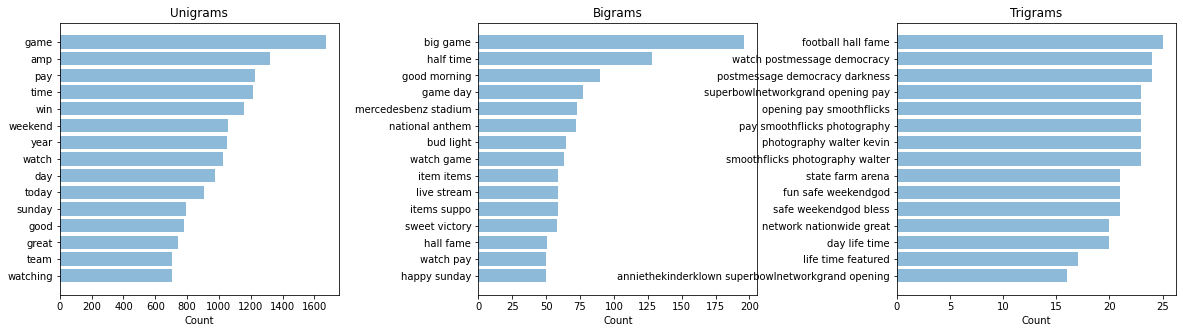

In [11]:
plotNgrams(df_us_2019['tweet'])

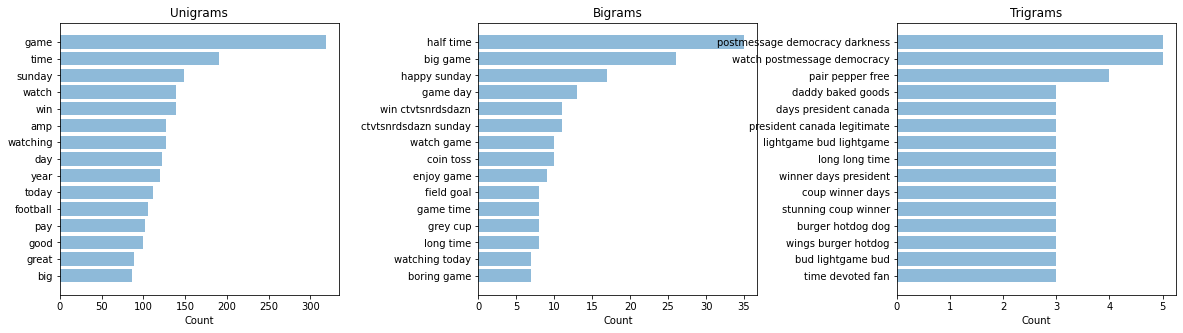

In [12]:
plotNgrams(df_ca_2019['tweet'])

ctv tsn rds dance 

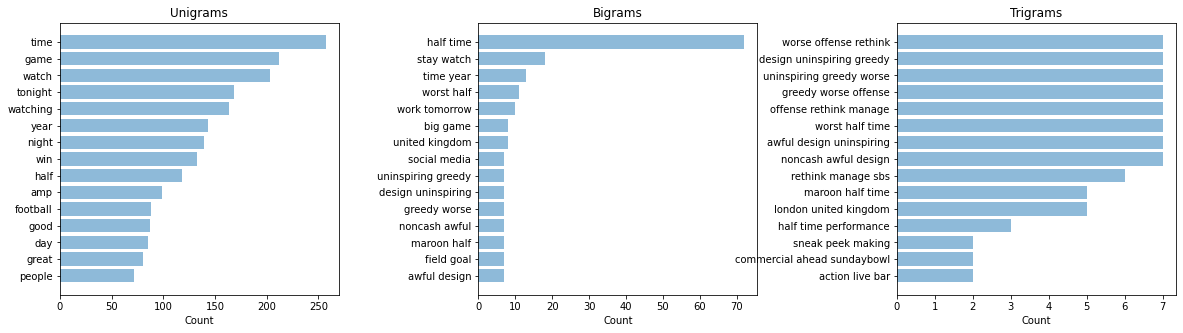

In [13]:
plotNgrams(df_gb_2019['tweet'])

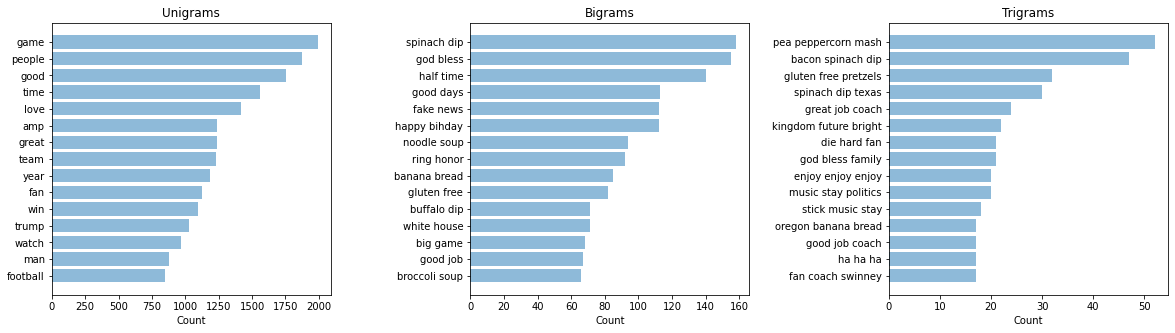

In [14]:
plotNgrams(df_us_2019_rep['tweet'])

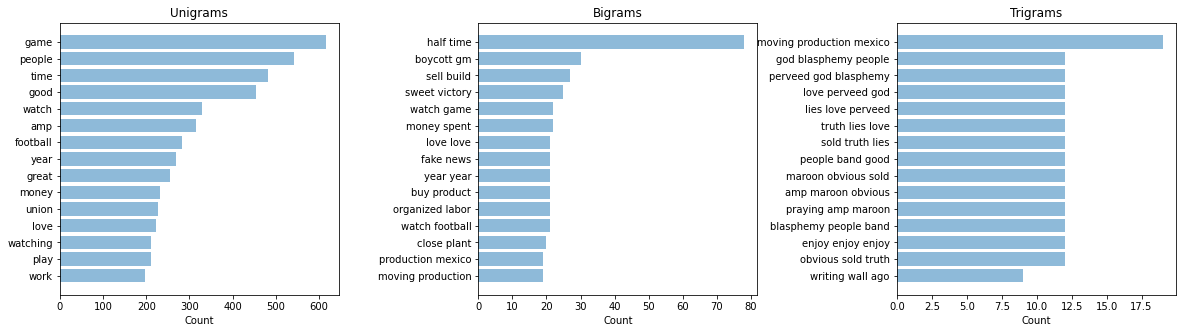

In [15]:
plotNgrams(df_ca_2019_rep['tweet'])

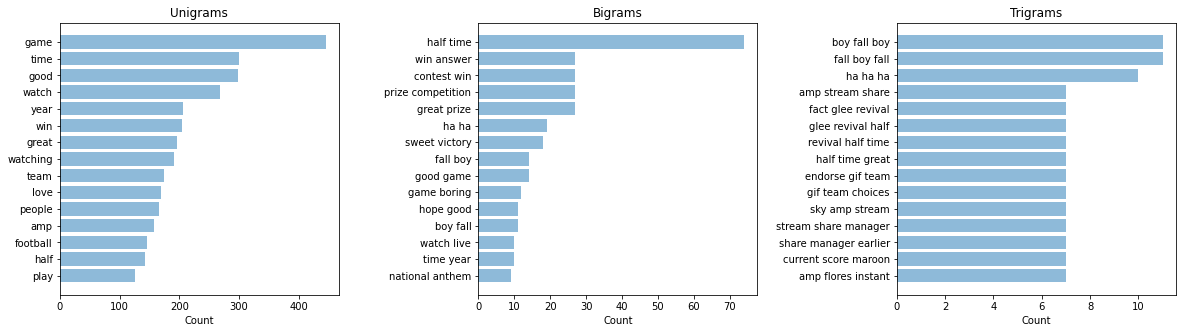

In [16]:
plotNgrams(df_gb_2019_rep['tweet'])

In [17]:
df_us_2021 = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/US/US_2021.csv")
df_ca_2021 = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/Canada/CA_2021.csv")
df_gb_2021 = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/GB/GB_2021.csv")

In [18]:
df_us_2021_rep = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/US/US_2021_replies.csv")
df_ca_2021_rep = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/Canada/CA_2021_replies.csv")
df_gb_2021_rep = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/GB/GB_2021_replies.csv")

In [19]:
df_us_2021["tweet"] = df_us_2021.text.progress_apply(lambda x:preprocessing_text(x))
df_ca_2021["tweet"] = df_ca_2021.text.progress_apply(lambda x:preprocessing_text(x))
df_gb_2021["tweet"] = df_gb_2021.text.progress_apply(lambda x:preprocessing_text(x))
df_us_2021_rep["tweet"] = df_us_2021_rep.text.progress_apply(lambda x:preprocessing_text(x))
df_ca_2021_rep["tweet"] = df_ca_2021_rep.text.progress_apply(lambda x:preprocessing_text(x))
df_gb_2021_rep["tweet"] = df_gb_2021_rep.text.progress_apply(lambda x:preprocessing_text(x))

  0%|          | 0/16886 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'


  0%|          | 0/2684 [00:00<?, ?it/s]

  0%|          | 0/2634 [00:00<?, ?it/s]

  0%|          | 0/89452 [00:00<?, ?it/s]

  0%|          | 0/15164 [00:00<?, ?it/s]

  0%|          | 0/12251 [00:00<?, ?it/s]

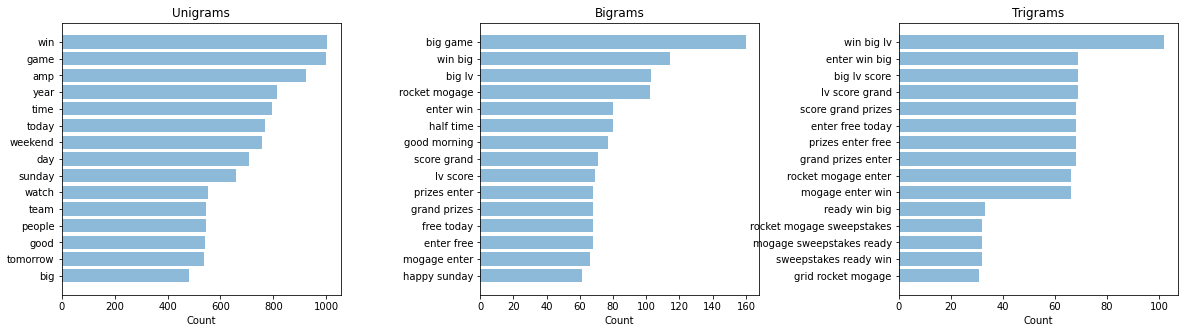

In [20]:
plotNgrams(df_us_2021['tweet'])

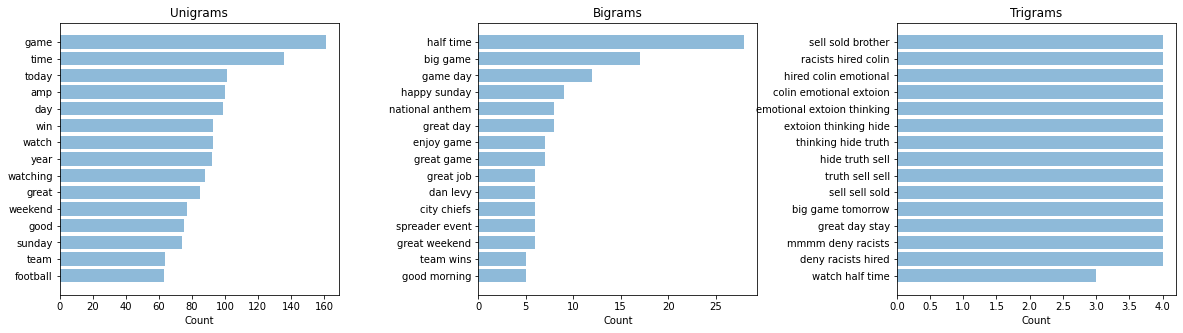

In [21]:
plotNgrams(df_ca_2021['tweet'])

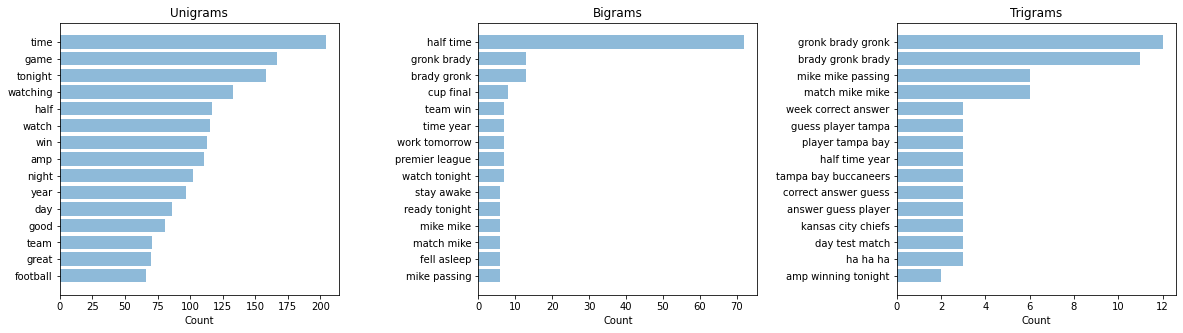

In [22]:
plotNgrams(df_gb_2021['tweet'])

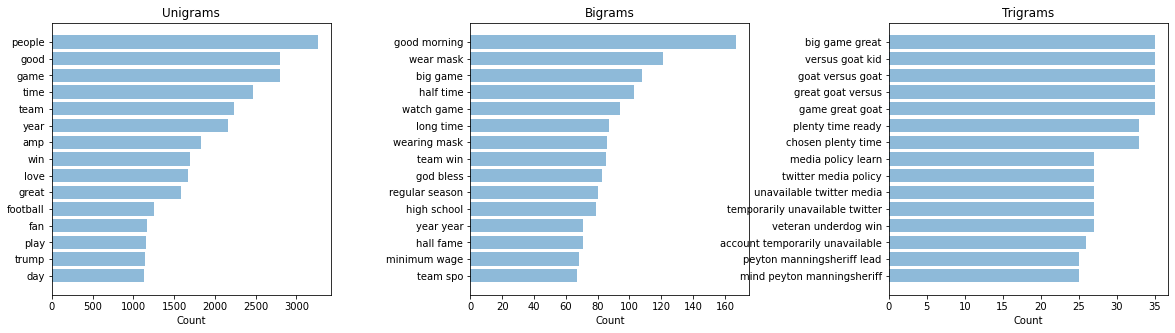

In [23]:
plotNgrams(df_us_2021_rep['tweet'])

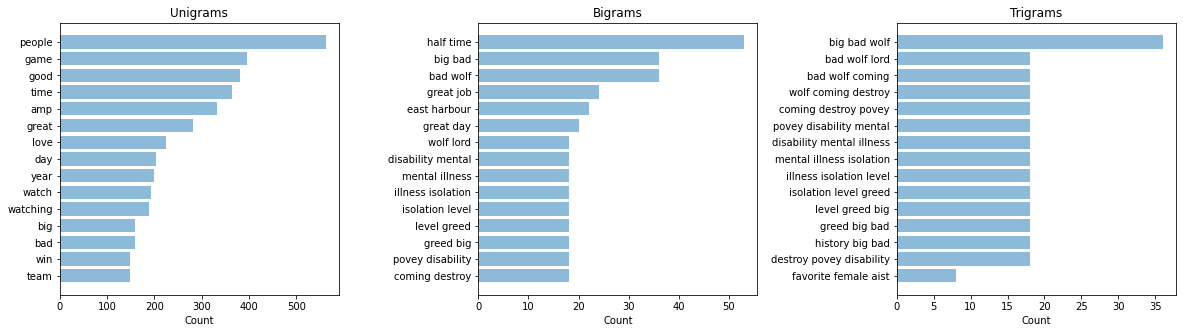

In [24]:
plotNgrams(df_ca_2021_rep['tweet'])

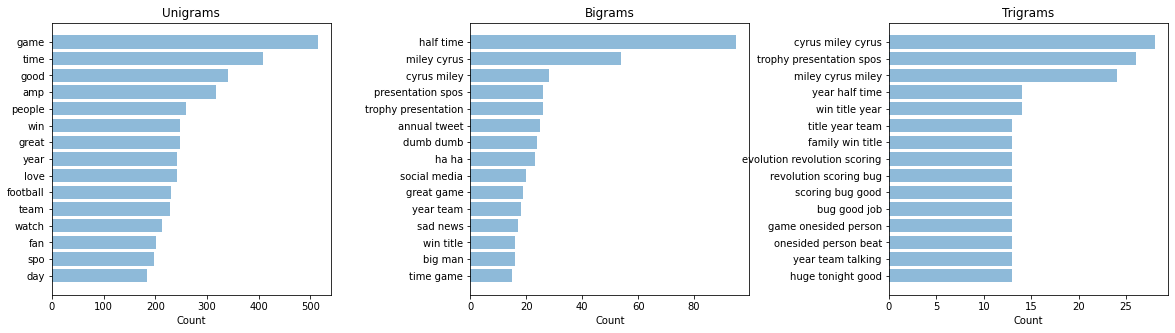

In [25]:
plotNgrams(df_gb_2021_rep['tweet'])

Igraph Documentation: https://igraph.org/python/tutorial/latest/tutorial.html

In [272]:
import igraph

In [322]:
def BigramsGraph(documents, size, n):
    ngrams_all = []
    for document in documents:
        tokens = [token for token in document.split(" ") if token not in remove_token and token not in stop_words_custom]
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df[['Node 1', 'Node 2']] = df['words'].str.split(' ', 1, expand=True)
    df["Weight"] = df["count"].astype("int")
    df.drop(["words", "count"], axis = 1, inplace = True)
    df.drop(df[df.Weight < n].index, inplace=True)
    g3 = igraph.Graph.TupleList(df.itertuples(index=False), directed=True, weights=False, edge_attrs=["Weight"])
    visual_style = {}
    visual_style["vertex_label"] = list(g3.vs['name'])
    visual_style["edge_label"] = list(g3.es['Weight'])
    visual_style["bbox"] = (500,500)
    visual_style["margin"] = 20
    visual_style["vertex_label_size"] = 12
    visual_style["edge_width"] = 0.2
    visual_style["edge_color"] = 'green'
    # layout = g3.layout("kamada_kawai")
    fig, ax = plt.subplots(figsize=(15, 15))
    igraph.plot(g3, target=ax, **visual_style)

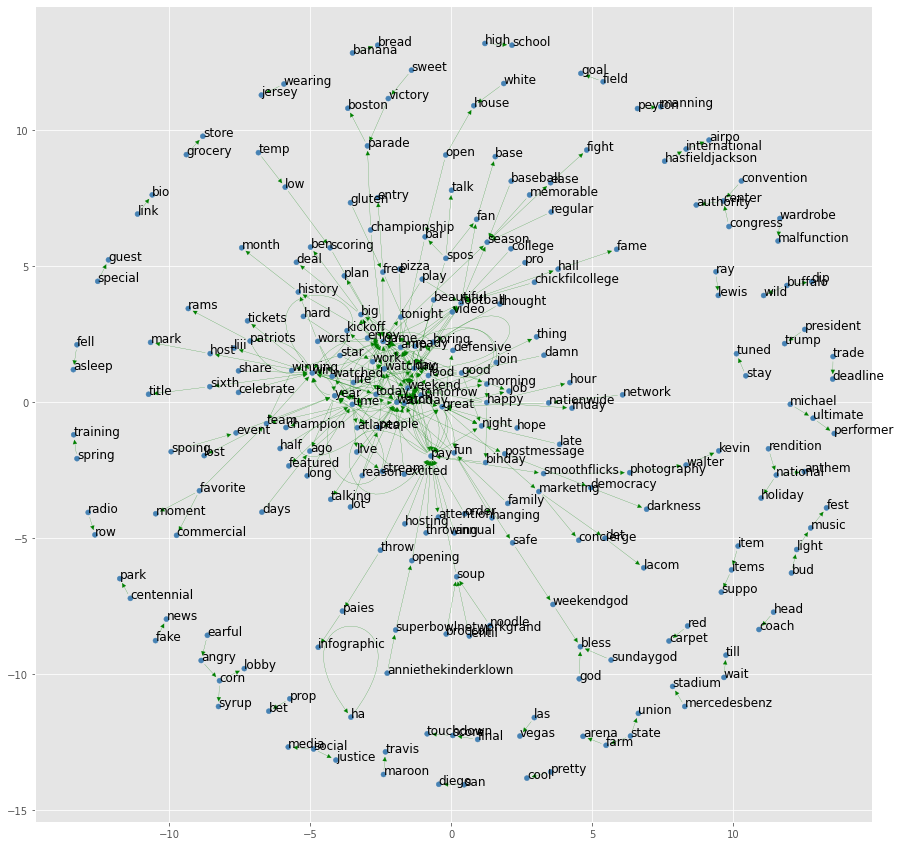

In [324]:
BigramsGraph(df_us_2019['tweet'], 2, 10)

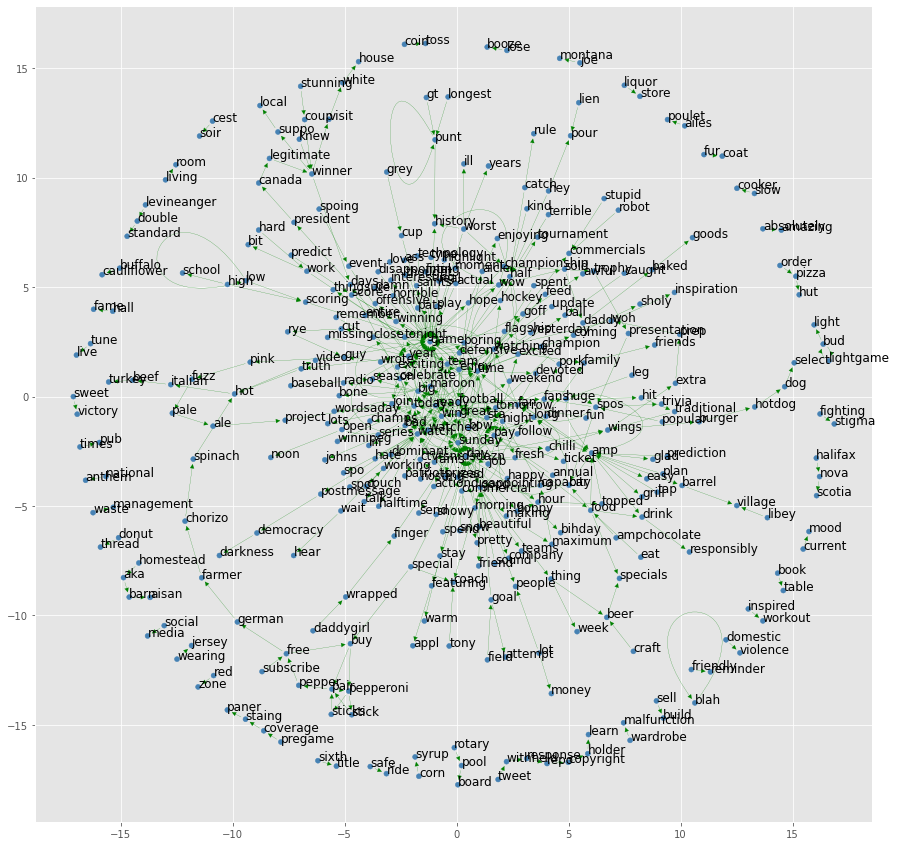

In [325]:
BigramsGraph(df_ca_2019['tweet'], 2, 2)

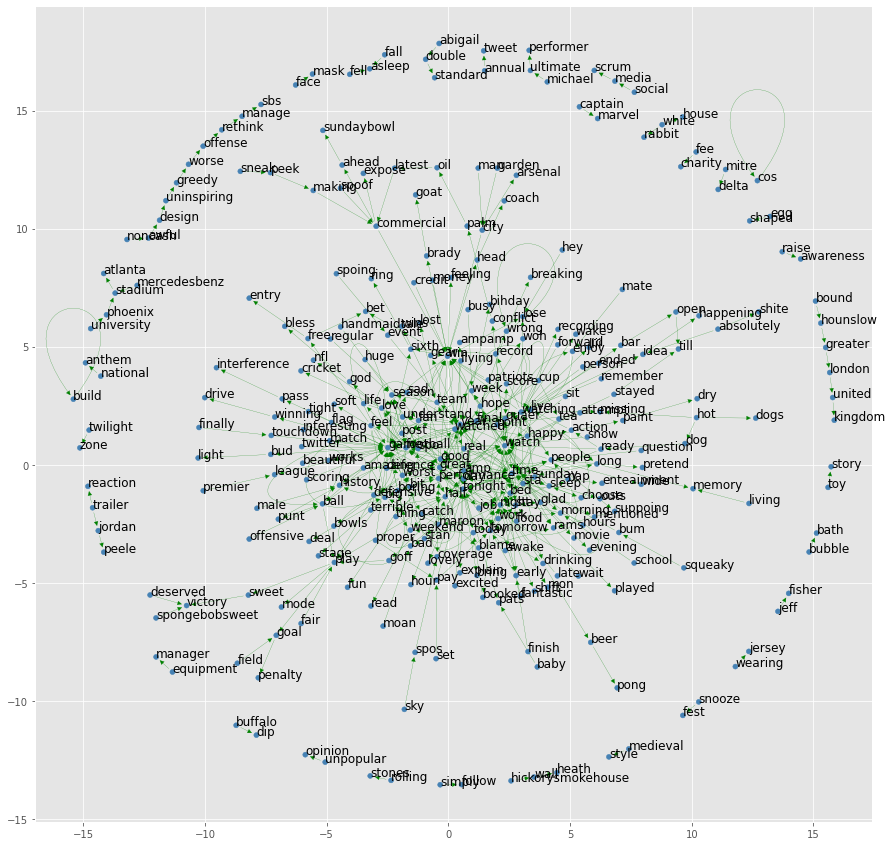

In [326]:
BigramsGraph(df_gb_2019['tweet'], 2, 2)

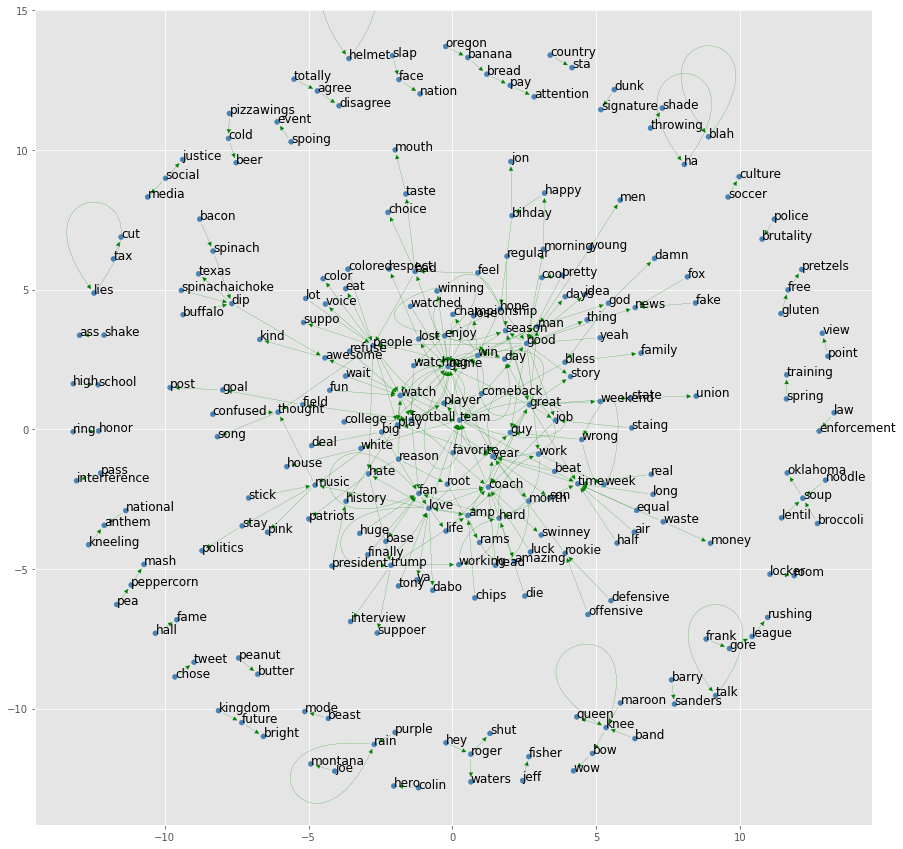

In [331]:
BigramsGraph(df_us_2019_rep['tweet'], 2, 16)

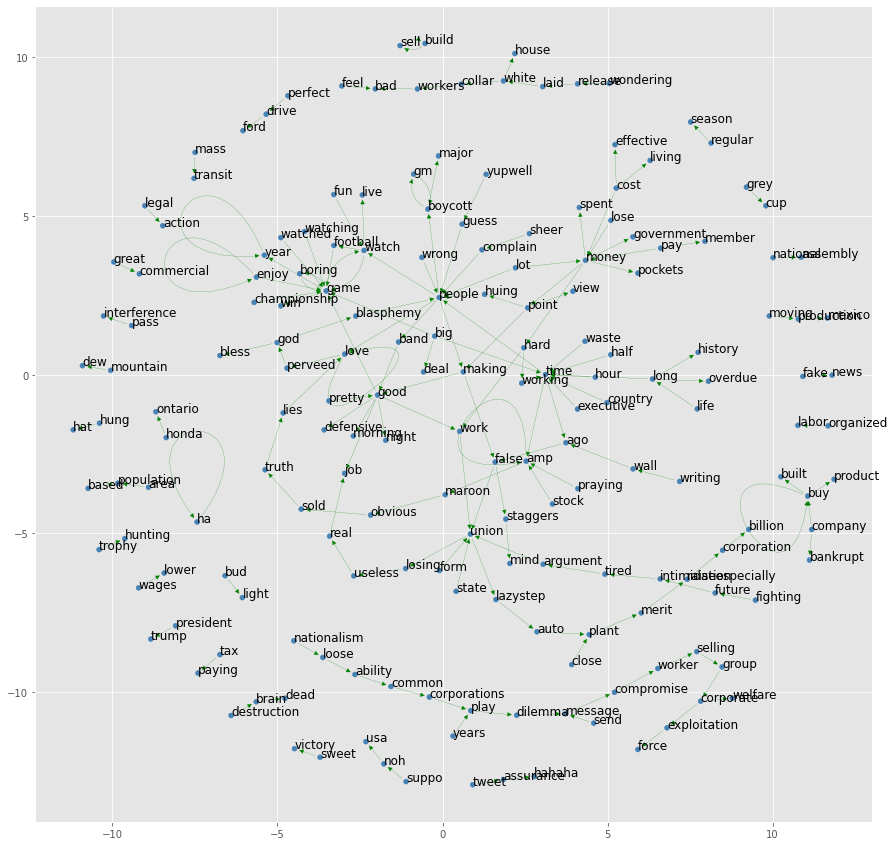

In [340]:
BigramsGraph(df_ca_2019_rep['tweet'], 2, 8)

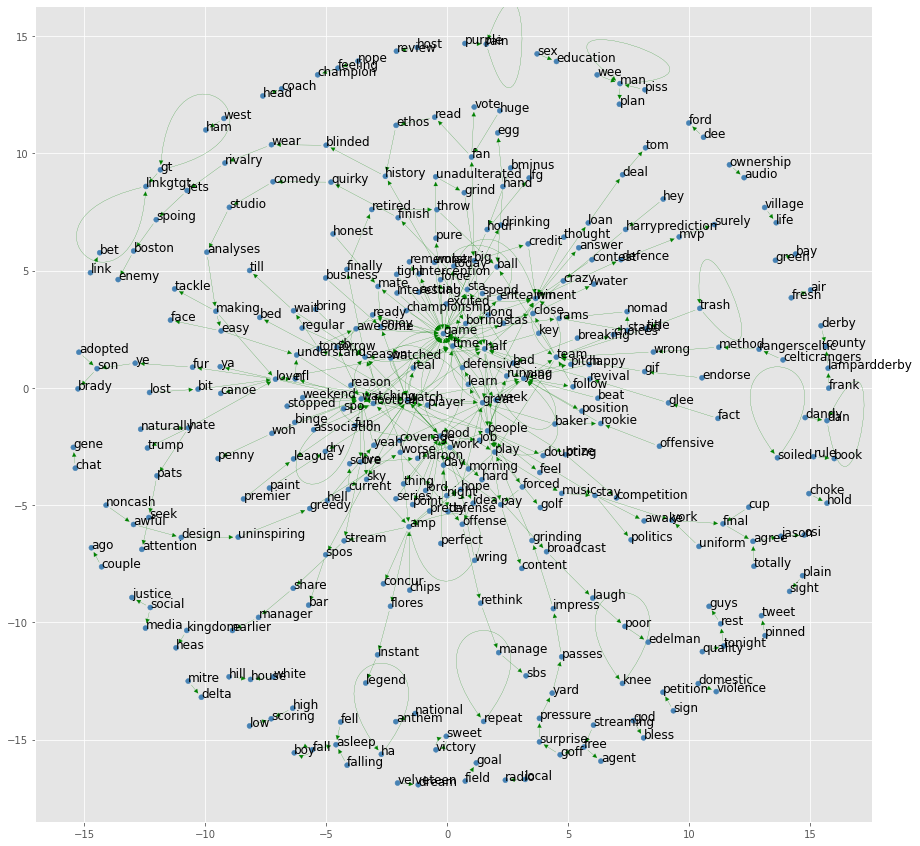

In [346]:
BigramsGraph(df_gb_2019_rep['tweet'], 2, 3)